In [1]:
#####################################################################################################
#####################################################################################################
# Sentiment analysis with TextBlob method
#####################################################################################################
#####################################################################################################

In [2]:
# Launched the programm 
%run "C:\\Users\\....\\Program\\2_Import and cleaning abstracts.ipynb"


In [3]:
# Change columns name
articles_vf.columns = ['Identifier','Abstract','Selection']

# Keep only abstract selected manually
articles_vf=articles_vf[articles_vf.Selection != 0]
del articles_vf['Selection']

# Keep and save identifier for a next use
Identifier_list=list(articles_vf['Identifier'])

# Formating the data
Abstract_list=articles_vf.values.tolist()
Abstract_dict=dict(Abstract_list)


In [4]:
# Import packages for graphics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [5]:
# Formating the data
def combine_text(list_of_text):
    combined_text = ''.join(list_of_text)
    return combined_text

All_data = {key: [combine_text(value)] for(key,value) in Abstract_dict.items()}

TextBlob_base = pd.DataFrame.from_dict(All_data).transpose()
TextBlob_base.columns = ['Abstract']

# Add the identifier column previously isolated
TextBlob_base["ID_Abstract"] = Identifier_list


In [6]:
# Calculating indicators for sentiment analysis with TextBlob
from textblob import TextBlob # (Download and install textblob-0.15.3-py2.py3-none-any.whl)

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

TextBlob_base['Polarity'] = TextBlob_base ['Abstract'].apply(pol)
TextBlob_base['Subjectivity'] = TextBlob_base ['Abstract'].apply(sub)


In [7]:
# Export the results
TextBlob_base = TextBlob_base[['ID_Abstract','Polarity','Subjectivity','Abstract']]
TextBlob_base.to_excel (r'C:\\Users\\....\\Result\\TextBlob_result.xlsx', index = False, header=True)


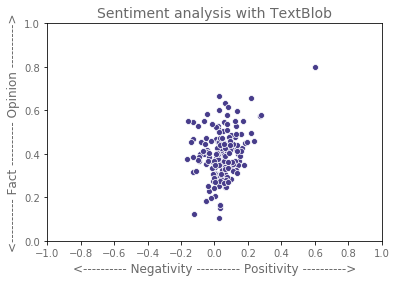

In [8]:
# First Graphic

G_TextBlob=sns.scatterplot(x="Polarity", y="Subjectivity", data=TextBlob_base, color=['darkslateblue'])

plt.xticks(np.arange(-1,1.1,0.2)) 
plt.yticks(np.arange(0,1.1,0.2))  
 
plt.tick_params(labelcolor='dimgrey', labelsize='medium')
    
plt.title('Sentiment analysis with TextBlob', color='dimgrey',fontsize=14)
plt.xlabel('<---------- Negativity ---------- Positivity ---------->', color='dimgrey', fontsize=12)
plt.ylabel('<---------- Fact ---------- Opinion ---------->', color='dimgrey',fontsize=12)

plt.rcParams['figure.figsize'] = [12,10]

# Print the plot
plt.show() 

# Save the plot
fig = G_TextBlob.get_figure()
fig.savefig("C:\\Users\\....\\Result\\Graph_TextBlob.png")
